In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
col_list = ['T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM', 'PM2.5 AQI Value']
df = pd.read_csv('data/airquality.csv', usecols=col_list)
df = df.rename({'PM2.5 AQI Value':'AQI'}, axis=1)

In [20]:
#Since climate information is not available for many of them, we have to remove those rows.
df = df.dropna()

In [21]:
df['H'].replace(to_replace='-', value='0', inplace=True)
df['PP'].replace(to_replace='-', value='0', inplace=True)
df['SLP'].replace(to_replace='-', value='0', inplace=True)

df['H'] = df['H'].astype(float)
df['PP'] = df['PP'].astype(float)
df['SLP'] = df['SLP'].astype(float)

## Train Test Split

In [22]:
X = df.loc[:,df.columns!= 'AQI']
y = df['AQI']

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
params = {'n_estimators' : [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
         'max_features':['auto', 'sqrt'],
         'max_depth' : [int(x) for x in np.linspace(5, 30, num = 6)],
         'min_samples_split' : [2, 5, 10, 15, 100],
         'min_samples_leaf' : [1, 2, 5, 10]}

In [28]:
%%time
rf=RandomForestRegressor()
rf_gs = GridSearchCV(estimator=rf,param_grid=params,scoring='neg_mean_squared_error',n_jobs=1,cv=5,verbose=2)
rf_gs.fit(X_train,y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=   2.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=   2.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=   2.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=   2.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, mi

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   1.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900, total=   2.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900, total=   2.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900, total=   2.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] max_depth=5, max_features=auto, min_samples_l

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600, total=   1.3s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_sa

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900, total=   1.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900, total=   1.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900, total=   1.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900, total=   1.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900, total=   1.8s
[CV] max_depth=5, max_features=auto, min_sa

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=   2.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=   2.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=   2.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=400, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_sa

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200, total=   2.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200, total=   2.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=800, total=   1.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=800 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=800, total=   1.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1200, total=   2.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1200, total=   2.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=800, total=   1.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=800 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=800, total=   1.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=900, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=900, total=   2.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=900, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200, total=   4.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200, total=   4.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=auto, min_sa

[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800, total=   2.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800, total=   2.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800, total=   2.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900, total=   2.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900, total=   2.5s
[CV] max_depth=5, max_features=auto, min_sa

[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200, total=   3.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200, total=   3.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200, total=   3.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200, total=   3.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samp

[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800, total=   2.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800, total=   2.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800, total=   2.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800, total=   2.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900, total=   3.2s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400, total=   1.6s
[CV] max_depth=5, max_features=auto, min_sa

[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1100, total=   3.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200, total=   4.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200, total=   4.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200, total=   4.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200, total=   4.0s
[CV] max_depth=5, max_features=aut

[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700, total=   2.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700, total=   2.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=800 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=800, total=   2.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=800 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=800, total=   2.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=800 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=800, total=   2.3s
[CV] max_depth=5, max_features=auto, min_sa

[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=300, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=300 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=300, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=300 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=300, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400, total=   0.8s
[CV] max_depth=5, max_features=aut

[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1100, total=   2.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1100, total=   2.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1100, total=   2.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1100, total=   2.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200, total=   2.3s
[CV] max_depth=5, max_fea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   1.7s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.1s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200, total=   1.6s
[CV] max_depth=5, max_features=sqrt, min_sa

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700, total=   0.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700, total=   0.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700, total=   0.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700, total=   0.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700, total=   0.9s
[CV] max_depth=5, max_features=sqrt, min_sa

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_sa

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_sa

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1000, total=   1.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1000, total=   1.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1000, total=   1.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100, total=   1.4s
[CV] max_depth=5, max_features=sqr

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1000, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1000, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1000, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_sa

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=600 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=600 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=600 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700, total=   0.9s
[CV] max_depth=5, max_features=sqrt, min_sa

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_sa

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600, total=   0.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_sa

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900, total=   1.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   1.4s
[CV] max_depth=5, max_features=sqrt

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=600 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=600 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=600 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=600, total=   0.9s
[CV] max_depth=5, max_features=sqrt, min_sa

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=sqr

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900, total=   1.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900, total=   1.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900, total=   1.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1000, total=   1.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1000, total=   1.3s
[CV] max_depth=5, max_features

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   1.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   1.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   1.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   1.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   2.1s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900, total=   2.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900, total=   2.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900, total=   2.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900, total=   2.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   3.1s
[CV] max_depth=10, max_features=auto, min_samples_

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500, total=   1.5s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   3.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800, total=   2.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800, total=   2.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=900 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=900, total=   2.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=900 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=900, total=   2.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=900 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=900, total=   2.6s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=400, total=   0.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=400 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=400, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=400 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=400, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=500, total=   1.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=500, total=   1.2s
[CV] max_depth=10, max_features=au

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1200, total=   2.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1200, total=   2.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1200, total=   2.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1200, total=   2.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   2.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   2.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   2.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   2.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=900 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=900, total=   2.8s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   1.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   1.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   1.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   1.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500, total=   1.6s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   4.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   3.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   3.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   3.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   2.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   2.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   2.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   2.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   2.4s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400, total=   1.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400, total=   1.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400, total=   1.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400, total=   1.1s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1100, total=   3.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1100, total=   3.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1200, total=   3.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1200, total=   3.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1200, total=   3.4s
[CV] max_depth=10, max_features=au

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=700, total=   1.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=700 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=700, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=700 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=700, total=   1.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=800 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=800, total=   1.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=800 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=800, total=   1.7s
[CV] max_depth=10, max_features=au

[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=300, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=300 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=300, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=300 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=300, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=300 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=300, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400, total=   1.1s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1100, total=   3.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1100, total=   3.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1100, total=   3.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1100, total=   3.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1200, total=   3.4s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=700, total=   2.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=700 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=700, total=   2.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=700 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=700, total=   2.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=700 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=700, total=   2.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=   2.2s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.9s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   3.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   3.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   3.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   3.1s
[CV] max_depth=10, max_features=au

[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600, total=   1.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600, total=   1.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700, total=   1.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700, total=   1.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700, total=   1.9s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300, total=   0.6s
[CV] max_depth=10, max_features=au

[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000, total=   2.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000, total=   2.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000, total=   2.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000, total=   2.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100, total=   2.2s
[CV] max_depth=10, max_fe

[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600, total=   1.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600, total=   1.5s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900, total=   2.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900, total=   2.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000, total=   2.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000, total=   2.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000, total=   2.5s
[CV] max_depth=10, max_features=auto,

[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   1.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   1.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   1.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=600 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=600, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=600 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=600, total=   1.5s
[CV] max_depth=10, max_features=au

[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=au

[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900, total=   2.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900, total=   2.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900, total=   2.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900, total=   2.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900, total=   2.3s
[CV] max_depth=10, max_features=au

[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500, total=   1.0s
[CV] max_depth=10, max_fe

[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200, total=   2.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200, total=   2.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200, total=   2.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=900 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=   1.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=900 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=   1.8s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900, total=   1.6s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100, total=   1.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200, total=   2.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200, total=   2.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200, total=   2.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200, total=   2.0s
[CV] max_depth=10, max_features=sq

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700, total=   1.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700, total=   1.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800, total=   1.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800, total=   1.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800, total=   1.1s
[CV] max_depth=10, max_features=sq

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100, total=   2.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100, total=   2.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100, total=   2.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700, total=   1.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700, total=   1.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700, total=   1.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100, total=   1.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100, total=   1.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100, total=   1.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100, total=   1.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100, total=   1.9s
[CV] max_depth=10, max_features=sq

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=600, total=   1.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700, total=   1.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700, total=   1.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700, total=   1.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700, total=   1.2s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300, total=   0.4s
[CV] max_depth=10, max_features=sq

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1000, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1000, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1000, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100, total=   1.5s
[CV] max_depth=10, max_fe

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=700 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=700, total=   1.2s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, total=   1.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, total=   1.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, total=   1.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, total=   1.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1100, total=   1.9s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600, total=   1.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600, total=   1.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600, total=   1.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600, total=   1.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600, total=   1.0s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=900, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1000, total=   1.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1000, total=   1.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1000, total=   1.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1000, total=   1.6s
[CV] max_depth=10, max_features=sqr

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=600 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=600 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=600 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=10, max_features=sq

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=900, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=900 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=900, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=900 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=900, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000, total=   1.6s
[CV] max_depth=10, max_features=sqrt, m

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=sq

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900, total=   1.4s
[CV] max_depth=10, max_features=sq

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=400, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=sq

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1200, total=   1.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1200, total=   1.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_fe

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=800, total=   1.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=800 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=800, total=   1.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=800 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=800, total=   1.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900, total=   1.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900, total=   1.2s
[CV] max_depth=10, max_fe

[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   1.6s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   1.6s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   1.6s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   1.6s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   2.0s
[CV] max_depth=15, max_features=auto, min_samples_le

[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   4.8s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   4.8s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   4.8s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   4.8s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=15, max_features=auto, min_sam

[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   2.9s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   2.9s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   2.9s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   2.9s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900, total=   3.2s
[CV] max_depth=15, max_features=auto, min_samples_le

[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   1.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   1.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   1.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   1.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   1.3s
[CV] max_depth=15, max_features=auto, min_s

[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100, total=   3.7s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   3.9s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   4.0s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   4.0s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   4.0s
[CV] max_depth=15, max_features=au

[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700, total=   2.2s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700, total=   2.2s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800, total=   2.4s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800, total=   2.5s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800, total=   2.5s
[CV] max_depth=15, max_features=auto, min_s

[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300, total=   0.6s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300, total=   0.6s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300, total=   0.6s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=400 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=400, total=   0.8s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=400 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=400, total=   0.9s
[CV] max_depth=15, max_features=au

[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1100, total=   2.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1100, total=   2.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1100, total=   2.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1100, total=   2.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1200, total=   2.5s
[CV] max_depth=15, max_fe

[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=700, total=   2.4s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=700 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=700, total=   2.5s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=700 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=700, total=   2.5s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=700 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=700, total=   2.5s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=700 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=700, total=   2.5s
[CV] max_depth=15, max_features=auto, min_samples_le

[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300, total=   1.0s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300, total=   1.1s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300, total=   1.1s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300, total=   1.1s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300, total=   1.0s
[CV] max_depth=15, max_features=auto, min_samples_le

[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100, total=   3.7s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100, total=   3.8s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100, total=   3.8s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100, total=   3.8s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100, total=   3.8s
[CV] max_depth=15, max_features=auto, min_s

[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.9s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=700 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=700, total=   2.2s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=700 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=700, total=   2.2s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=700 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=700, total=   2.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=700 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=700, total=   2.3s
[CV] max_depth=15, max_features=auto, min_s

[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200, total=   0.6s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200, total=   0.6s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300, total=   0.9s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300, total=   0.9s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300, total=   0.9s
[CV] max_depth=15, max_features=auto, min_s

[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000, total=   3.0s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000, total=   3.0s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000, total=   3.0s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1100, total=   3.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1100, total=   3.3s
[CV] max_depth=15, max_features=au

[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=600, total=   1.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=600 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=600, total=   1.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=600 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=600, total=   1.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=600 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=600, total=   1.2s
[CV] max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=700 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=700, total=   1.4s
[CV] max_depth=15, max_features=au

[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=15, max_features=auto, min_samples_le

[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, total=   2.9s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, total=   3.0s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, total=   2.9s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, total=   3.0s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, total=   3.0s
[CV] max_depth=15, max_features=auto, min_s

[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600, total=   1.7s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600, total=   1.8s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600, total=   1.8s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600, total=   1.8s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600, total=   1.8s
[CV] max_depth=15, max_features=auto, min_samples_le

[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.6s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.6s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.6s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.6s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.6s
[CV] max_depth=15, max_features=auto, min_s

[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=900, total=   2.6s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.9s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.9s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.9s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   3.0s
[CV] max_depth=15, max_features=aut

[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=500, total=   1.4s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=500 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=500, total=   1.4s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600, total=   1.7s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600, total=   1.7s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600, total=   1.7s
[CV] max_depth=15, max_features=auto, min_s

[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=15, max_features=au

[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900, total=   1.8s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900, total=   1.9s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900, total=   1.8s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000, total=   2.0s
[CV] max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000, total=   2.1s
[CV] max_depth=15, max_feature

[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   1.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   1.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   1.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   1.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600, total=   1.5s
[CV] max_depth=15, max_features=auto, min_s

[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=15, max_features=auto, min_s

[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800, total=   2.0s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900, total=   2.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900, total=   2.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900, total=   2.4s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900, total=   2.4s
[CV] max_depth=15, max_features=auto, min_s

[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400, total=   1.0s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400, total=   1.1s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   1.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   1.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   1.3s
[CV] max_depth=15, max_features=au

[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200, total=   3.1s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200, total=   3.1s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200, total=   3.1s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=15, max_featur

[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=800, total=   2.1s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=800 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=800, total=   2.0s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=800 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=800, total=   2.1s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=800 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=800, total=   2.0s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900, total=   2.3s
[CV] max_depth=15, max_features=au

[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400, total=   0.8s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400, total=   0.8s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400, total=   0.8s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400, total=   0.8s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400, total=   0.8s
[CV] max_depth=15, max_fe

[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1100, total=   2.2s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200, total=   2.4s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200, total=   2.4s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200, total=   2.4s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200, total=   2.4s
[CV] max_depth=1

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700, total=   1.6s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700, total=   1.6s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.9s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.9s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.8s
[CV] max_depth=15, max_features=sqrt, min_samples_le

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300, total=   0.6s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300, total=   0.6s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] max_depth=15, max_features=sqrt, min_samples_le

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100, total=   2.3s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100, total=   2.3s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.4s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.4s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.4s
[CV] max_depth=15, max_features=sqrt, min_s

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700, total=   1.3s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700, total=   1.3s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700, total=   1.3s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] max_depth=15, max_features=sqrt, min_s

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300, total=   0.5s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300, total=   0.5s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300, total=   0.5s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300, total=   0.5s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400, total=   0.7s
[CV] max_depth=15, max_features=sqrt, min_s

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100, total=   2.0s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100, total=   2.0s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100, total=   2.0s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100, total=   2.0s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100, total=   2.0s
[CV] max_depth=15, max_features=sq

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700, total=   1.0s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700, total=   1.0s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700, total=   1.0s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700, total=   1.0s
[CV] max_depth=15, max_features=sq

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   0.6s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   0.6s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   0.6s
[CV] max_depth=15, max_features=sqrt, min_samples_le

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.0s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.0s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100, total=   2.2s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100, total=   2.2s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100, total=   2.2s
[CV] max_depth=15, max_features=sqrt, min_s

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700, total=   1.4s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700, total=   1.4s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700, total=   1.4s
[CV] max_depth=15, max_features=sqrt, min_samples_le

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300, total=   0.6s
[CV] max_depth=15, max_features=sqrt, min_s

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   1.9s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100, total=   2.0s
[CV] max_depth=15, max_features=sq

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=600, total=   1.1s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=600 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=600, total=   1.1s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=600 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=600, total=   1.0s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=600 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=600, total=   1.1s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=600 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=600, total=   1.1s
[CV] max_depth=15, max_features=sqrt, min_s

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=15, max_features=sq

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=900, total=   1.3s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1000, total=   1.4s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1000, total=   1.4s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1000, total=   1.4s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1000, total=   1.4s
[CV] max_depth=15, max_fea

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=500, total=   0.9s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=500 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=500, total=   0.9s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] max_depth=15, max_features=sqrt, min_samples_le

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] max_depth=15, max_features=sqrt, min_samples_le

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900, total=   1.6s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900, total=   1.6s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, total=   1.7s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, total=   1.7s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, total=   1.7s
[CV] max_depth=15, max_features=sqrt, min_samp

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500, total=   0.9s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500, total=   0.9s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500, total=   0.9s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600, total=   1.0s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] max_depth=15, max_features=sqrt, min_s

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200, total=   0.3s
[CV] max_depth=15, max_features=sqrt, min_s

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=900, total=   1.5s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=900 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=900, total=   1.5s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=900 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=900, total=   1.5s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=900 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=900, total=   1.5s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=900 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=900, total=   1.5s
[CV] max_depth=15, max_features=sqrt, min_s

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=400, total=   0.6s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=15, max_features=sq

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1200, total=   1.7s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1200, total=   1.6s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=15, max_features=sqrt,

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800, total=   1.3s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800, total=   1.3s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800, total=   1.3s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=900 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=900, total=   1.4s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=900 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=900, total=   1.4s
[CV] max_depth=15, max_features=sqrt, min_s

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400, total=   0.6s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400, total=   0.6s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400, total=   0.6s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400, total=   0.6s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500, total=   0.8s
[CV] max_depth=15, max_features=sqrt, min_s

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200, total=   1.9s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200, total=   1.9s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200, total=   1.9s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200, total=   1.9s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200, total=   1.9s
[CV] max_depth=15, max_features=sq

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700, total=   1.1s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=800 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=800, total=   1.2s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=800 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=800, total=   1.3s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=800 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=800, total=   1.3s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=800 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=800, total=   1.3s
[CV] max_depth=15, max_features=sq

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300, total=   0.5s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300, total=   0.5s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=400 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=400, total=   0.6s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=400 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=400, total=   0.6s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=400 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=400, total=   0.7s
[CV] max_depth=15, max_features=sq

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100, total=   1.7s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100, total=   1.7s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100, total=   1.7s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1200, total=   1.9s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1200, total=   1.9s
[CV] max_depth=15, max_fe

[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700, total=   0.9s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700, total=   0.9s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700, total=   1.0s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700, total=   0.9s
[CV] max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=800 
[CV]  max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=800, total=   1.1s
[CV] max_depth=15, max_fe

[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   1.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   1.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   1.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   1.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   1.3s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100, total=   4.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100, total=   4.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100, total=   4.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100, total=   4.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100, total=   4.6s
[CV] max_depth=20, max_features=auto, min_s

[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700, total=   2.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700, total=   2.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700, total=   2.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700, total=   2.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700, total=   2.6s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300, total=   1.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300, total=   1.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300, total=   1.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300, total=   1.0s
[CV] max_depth=20, max_features=auto, min_s

[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   3.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   3.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100, total=   3.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100, total=   3.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100, total=   3.6s
[CV] max_depth=20, max_features=au

[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600, total=   1.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600, total=   1.9s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600, total=   1.9s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700, total=   2.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700, total=   2.2s
[CV] max_depth=20, max_features=auto, min_s

[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300, total=   0.6s
[CV] max_depth=20, max_features=au

[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000, total=   2.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000, total=   2.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000, total=   2.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000, total=   2.1s
[CV] max_depth=20, max_fe

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   1.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   2.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   2.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   2.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   2.2s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.7s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=   3.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   3.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   3.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   3.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   3.5s
[CV] max_depth=20, max_features=auto, min_sa

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   1.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   1.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.9s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.9s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.9s
[CV] max_depth=20, max_features=auto, min_s

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=auto, min_s

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=   2.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=   2.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=   2.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=   2.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000, total=   3.0s
[CV] max_depth=20, max_features=auto, min

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500, total=   1.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500, total=   1.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500, total=   1.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500, total=   1.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500, total=   1.0s
[CV] max_depth=20, max_features=au

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200, total=   2.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples

[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=800, total=   2.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900, total=   2.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900, total=   2.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900, total=   2.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900, total=   2.7s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400, total=   1.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total=   1.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total=   1.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total=   1.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total=   1.5s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1200, total=   3.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_s

[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=800, total=   2.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=800 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=800, total=   2.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=900 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=900, total=   2.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=900 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=900, total=   2.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=900 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=900, total=   2.6s
[CV] max_depth=20, max_features=auto, min_s

[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400, total=   1.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400, total=   1.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400, total=   1.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=500, total=   1.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=500, total=   1.4s
[CV] max_depth=20, max_features=auto, min_s

[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200, total=   3.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200, total=   3.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200, total=   3.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200, total=   3.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=au

[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800, total=   1.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800, total=   1.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800, total=   1.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800, total=   1.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800, total=   1.7s
[CV] max_depth=20, max_features=au

[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=300, total=   0.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400, total=   1.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400, total=   1.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400, total=   1.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400, total=   1.0s
[CV] max_depth=20, max_features=auto, min_s

[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100, total=   2.9s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100, total=   2.9s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200, total=   3.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200, total=   3.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200, total=   3.1s
[CV] max_depth=20, max_features=au

[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700, total=   1.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700, total=   1.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700, total=   1.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800, total=   2.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800, total=   2.1s
[CV] max_depth=20, max_features=auto, min_s

[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300, total=   0.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300, total=   0.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300, total=   0.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300, total=   0.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400, total=   1.0s
[CV] max_depth=20, max_features=au

[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1100, total=   2.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1100, total=   3.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1100, total=   2.9s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1100, total=   2.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1100, total=   2.8s
[CV] max_depth=20, max_fe

[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=600, total=   1.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700, total=   1.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700, total=   1.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700, total=   1.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700, total=   1.8s
[CV] max_depth=20, max_features=au

[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=300, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=300, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=300, total=   0.6s
[CV] max_depth=20, max_fe

[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000, total=   2.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000, total=   2.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000, total=   2.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1100, total=   2.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1100, total=   2.2s
[CV] max_depth=2

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700, total=   1.7s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100, total=   2.3s
[CV] max_depth=20, max_features=sqrt, min_s

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.2s
[CV] max_depth=20, max_features=sqrt, min_s

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_s

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900, total=   1.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000, total=   1.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000, total=   1.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000, total=   1.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000, total=   1.8s
[CV] max_depth=20, max_features=sqr

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=600 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=600 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=600 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=20, max_features=sq

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900, total=   1.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900, total=   1.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900, total=   1.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.0s
[CV] max_depth=20, max_features=sqrt, min_sample

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500, total=   1.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500, total=   1.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500, total=   1.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_s

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900, total=   1.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900, total=   1.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900, total=   1.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   1.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   1.9s
[CV] max_depth=20, max_features=sqrt, m

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=600 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=600, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_s

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=20, max_features=sq

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=900, total=   1.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=900 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=900, total=   1.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=900 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=900, total=   1.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=900 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=900, total=   1.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=900 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=900, total=   1.2s
[CV] max_depth=20, max_features=sq

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=500, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=500, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=500, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=500, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200, total=   2.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_l

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=   1.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900, total=   1.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900, total=   1.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900, total=   1.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900, total=   1.6s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_s

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, 

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=800, total=   1.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=800 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=800, total=   1.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=800 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=800, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=800 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=800, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=900 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=900, total=   1.5s
[CV] max_depth=20, max_features=sqrt, min_s

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=400, total=   0.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=400 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=400, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=400 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=400, total=   0.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=400 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=400, total=   0.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=400 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=400, total=   0.5s
[CV] max_depth=20, max_features=sq

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100, total=   1.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1200, total=   1.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1200, total=   1.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1200, total=   1.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1200, total=   1.6s
[CV] max_depth=20, max_fe

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_s

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300, total=   0.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300, total=   0.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300, total=   0.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_s

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100, total=   1.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100, total=   1.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100, total=   1.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100, total=   1.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200, total=   1.9s
[CV] max_depth=20, max_features=sq

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700, total=   1.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700, total=   1.1s
[CV] max_depth=20, max_features=sq

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300, total=   0.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300, total=   0.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300, total=   0.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300, total=   0.5s
[CV] max_depth=20, max_features=sq

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000, total=   1.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000, total=   1.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100, total=   1.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100, total=   1.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100, total=   1.7s
[CV] max_depth=20, max_fe

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=600 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=600 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700, total=   1.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700, total=   1.0s
[CV] max_depth=20, max_fe

[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.9s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.9s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   1.3s
[CV] max_depth=25, max_features=auto, min_samples_le

[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   4.2s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   4.2s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   4.2s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   4.2s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100, total=   4.6s
[CV] max_depth=25, max_features=auto, min_s

[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   2.2s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   2.2s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   2.2s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   2.2s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700, total=   2.5s
[CV] max_depth=25, max_features=auto, min_samples_le

[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.7s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.7s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.7s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.7s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300, total=   1.0s
[CV] max_depth=25, max_features=auto, min_s

[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   3.3s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   3.3s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   3.3s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   3.3s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   3.3s
[CV] max_depth=25, max_features=au

[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500, total=   1.6s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600, total=   1.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600, total=   1.9s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600, total=   1.9s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600, total=   1.9s
[CV] max_depth=25, max_features=auto, min_s

[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=25, max_features=au

[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900, total=   1.9s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900, total=   1.9s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900, total=   1.9s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000, total=   2.2s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000, total=   2.1s
[CV] max_depth=25, max_feature

[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   1.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   1.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   1.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   1.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   2.2s
[CV] max_depth=25, max_features=auto, min_samples_le

[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.7s
[CV] max_depth=25, max_features=auto, min_samples_le

[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=   3.2s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=   3.1s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=   3.2s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=   3.1s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   3.5s
[CV] max_depth=25, max_features=auto, min_samples_

[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   1.6s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   1.6s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   1.6s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   1.6s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   1.6s
[CV] max_depth=25, max_features=auto, min_s

[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   3.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=25, max_features=auto, min_

[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800, total=   2.5s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800, total=   2.4s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=   2.7s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=   2.7s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=   2.7s
[CV] max_depth=25, max_features=auto, min_s

[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=400, total=   0.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=400 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=400, total=   0.9s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=400 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=400, total=   0.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500, total=   1.0s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500, total=   1.0s
[CV] max_depth=25, max_features=au

[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200, total=   2.5s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200, total=   2.5s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200, total=   2.6s
[CV] max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200, total=   2.5s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=25, max_features

[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=800, total=   2.4s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=800 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=800, total=   2.3s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=800 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=800, total=   2.4s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=800 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=800, total=   2.3s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900, total=   2.6s
[CV] max_depth=25, max_features=auto, min_samples_le

[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400, total=   1.2s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400, total=   1.2s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400, total=   1.2s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400, total=   1.2s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total=   1.5s
[CV] max_depth=25, max_features=auto, min_samples_le

[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1200, total=   3.5s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1200, total=   3.5s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1200, total=   3.6s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1200, total=   3.5s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=25, max_features=auto, min_s

[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=800, total=   2.3s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=800 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=800, total=   2.4s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=800 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=800, total=   2.3s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=800 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=800, total=   2.4s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=800 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=800, total=   2.3s
[CV] max_depth=25, max_features=auto, min_s

[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300, total=   0.9s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400, total=   1.1s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400, total=   1.1s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400, total=   1.1s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400, total=   1.1s
[CV] max_depth=25, max_features=auto, min_s

[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1100, total=   3.1s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1100, total=   3.1s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200, total=   3.3s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200, total=   3.5s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200, total=   3.4s
[CV] max_depth=25, max_features=au

[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700, total=   1.4s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700, total=   1.5s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700, total=   1.4s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800, total=   1.6s
[CV] max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800, total=   1.7s
[CV] max_depth=25, max_features=au

[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=300, total=   0.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=300 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=300, total=   0.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=300 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=300, total=   0.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=300 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=300, total=   0.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400, total=   1.0s
[CV] max_depth=25, max_features=auto, min_s

[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100, total=   2.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100, total=   2.9s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100, total=   2.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100, total=   2.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100, total=   2.8s
[CV] max_depth=25, max_features=au

[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=600, total=   1.5s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700, total=   1.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700, total=   1.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700, total=   1.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700, total=   1.8s
[CV] max_depth=25, max_features=auto, min_s

[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300, total=   0.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300, total=   0.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300, total=   0.8s
[CV] max_depth=25, max_features=au

[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1100, total=   2.8s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1100, total=   2.8s
[CV] max_depth=25, max_fe

[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=600, total=   1.6s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=600 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=600, total=   1.5s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=600 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=600, total=   1.5s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=600 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=600, total=   1.6s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700, total=   1.8s
[CV] max_depth=25, max_features=au

[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=25, max_fe

[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=900, total=   1.9s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000, total=   2.0s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000, total=   2.1s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000, total=   2.0s
[CV] max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000, total=   2.0s
[CV] max_depth=25

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   1.2s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   1.2s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.4s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.4s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   1.4s
[CV] max_depth=25, max_features=sqrt, min_samples_le

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=25, max_features=sqrt, min_samples_le

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900, total=   1.9s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900, total=   1.9s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.1s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.1s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.1s
[CV] max_depth=25, max_features=sqrt, min_samp

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500, total=   0.9s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500, total=   0.9s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500, total=   0.9s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] max_depth=25, max_features=sqrt, min_s

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200, total=   0.4s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200, total=   0.4s
[CV] max_depth=25, max_features=sqrt, min_s

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900, total=   1.6s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900, total=   1.6s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900, total=   1.6s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900, total=   1.6s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000, total=   1.8s
[CV] max_depth=25, max_features=sqrt, min

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=500 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=500 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=500 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=500 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=25, max_features=sq

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1200, total=   1.7s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=25, max_features=sqrt, min_samples

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.6s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900, total=   1.8s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900, total=   1.8s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900, total=   1.8s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900, total=   1.8s
[CV] max_depth=25, max_features=sqrt, min_samples_le

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.9s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500, total=   1.0s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500, total=   1.0s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500, total=   1.0s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500, total=   1.0s
[CV] max_depth=25, max_features=sqrt, min_samples_le

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.4s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=25, max_features=sqrt, min_s

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900, total=   1.7s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900, total=   1.7s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900, total=   1.7s
[CV] max_depth=25, max_features=sqrt, min_s

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=400, total=   0.7s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=400 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=400, total=   0.7s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=400 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=400, total=   0.7s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500, total=   0.9s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500, total=   0.9s
[CV] max_depth=25, max_features=sqrt, min_s

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200, total=   2.1s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200, total=   2.1s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200, total=   2.1s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200, total=   2.1s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100, total=   0.1s
[CV] max_depth=25, max_features=sq

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800, total=   1.1s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800, total=   1.1s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800, total=   1.1s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800, total=   1.1s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800, total=   1.1s
[CV] max_depth=25, max_features=sq

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300, total=   0.5s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=25, max_features=sqrt, min_samples_le

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100, total=   1.9s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200, total=   2.1s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200, total=   2.1s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200, total=   2.1s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200, total=   2.1s
[CV] max_depth=25, max_features=sqrt, min_s

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700, total=   1.2s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=   1.4s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=   1.4s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=   1.4s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=   1.4s
[CV] max_depth=25, max_features=sqrt, min_samples_le

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400, total=   0.7s
[CV] max_depth=25, max_features=sqrt, min_s

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   1.9s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   1.9s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   1.9s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.1s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.1s
[CV] max_depth=25, max_features=sq

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=700, total=   1.2s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=700 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=700, total=   1.2s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=700 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=700, total=   1.2s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=700 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=700, total=   1.2s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=800 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=800, total=   1.3s
[CV] max_depth=25, max_features=sqrt, min_s

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300, total=   0.4s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300, total=   0.4s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300, total=   0.4s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300, total=   0.4s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300, total=   0.4s
[CV] max_depth=25, max_features=sq

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1000, total=   1.4s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100, total=   1.5s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100, total=   1.5s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100, total=   1.5s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100, total=   1.5s
[CV] max_depth=25, max_fe

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700, total=   1.1s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700, total=   1.1s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700, total=   1.1s
[CV] max_depth=25, max_features=sqrt, min_s

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300, total=   0.5s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300, total=   0.5s
[CV] max_depth=25, max_features=sqrt, min_s

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000, total=   1.6s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000, total=   1.6s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000, total=   1.6s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000, total=   1.6s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100, total=   1.8s
[CV] max_depth=25, max_features=sq

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=600, total=   0.9s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=600 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=600, total=   0.9s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=600 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=600, total=   0.9s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=600 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=600, total=   0.9s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=600 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=600, total=   0.9s
[CV] max_depth=25, max_features=sq

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200, total=   0.3s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200, total=   0.3s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200, total=   0.3s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200, total=   0.3s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200, total=   0.3s
[CV] max_depth=25, max_features=sq

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=900, total=   1.5s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000, total=   1.6s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000, total=   1.6s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000, total=   1.6s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000, total=   1.6s
[CV] max_depth=25, max_fea

[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=600 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=600 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=600 
[CV]  max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=25, max_fe

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.8s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.8s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=   3.7s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=900 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=   3.8s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=900 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=   3.8s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   4.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   4.2s
[CV] max_depth=30, max_features=auto, min_sample

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   1.8s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   1.8s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   1.8s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   2.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   2.2s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.7s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.7s
[CV] max_depth=30, max_features=auto, min_s

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900, total=   3.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900, total=   3.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900, total=   3.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900, total=   3.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   3.3s
[CV] max_depth=30, max_features=auto, min

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500, total=   1.7s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500, total=   2.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500, total=   2.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500, total=   1.8s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500, total=   1.8s
[CV] max_depth=30, max_features=auto, min_s

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1200, total=   3.7s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=au

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=800, total=   1.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=800 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=800, total=   2.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900, total=   2.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900, total=   2.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900, total=   1.9s
[CV] max_depth=30, max_features=au

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   1.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   1.7s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   1.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   1.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   1.9s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   4.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   4.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   4.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=30, max_features=auto, min_sampl

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   2.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   2.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   2.8s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=   3.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=   3.2s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   1.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   1.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   1.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, total=   1.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   1.7s
[CV] max_depth=30, max_features=auto, min_s

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   3.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   3.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   3.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   4.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200, total=   3.9s
[CV] max_depth=30, max_features=au

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=700, total=   2.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800, total=   2.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800, total=   2.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800, total=   2.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800, total=   2.5s
[CV] max_depth=30, max_features=auto, min_s

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300, total=   0.7s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=400 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=400, total=   0.8s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=400 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=400, total=   0.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=400 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=400, total=   0.8s
[CV] max_depth=30, max_features=au

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1100, total=   2.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1100, total=   2.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1100, total=   2.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200, total=   2.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200, total=   2.6s
[CV] max_depth=30, max_fe

[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=700, total=   2.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=700 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=700, total=   2.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=700 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=700, total=   2.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=700 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=700, total=   2.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=800 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=800, total=   2.4s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300, total=   0.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300, total=   0.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300, total=   0.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300, total=   0.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400, total=   1.2s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1100, total=   3.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1100, total=   3.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1100, total=   3.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1100, total=   3.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1200, total=   3.6s
[CV] max_depth=30, max_features=auto, min_s

[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=700, total=   2.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=700 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=700, total=   2.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=700 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=700, total=   2.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=700 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=700, total=   2.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=700 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=700, total=   2.1s
[CV] max_depth=30, max_features=auto, min_s

[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=200, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300, total=   0.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300, total=   0.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300, total=   0.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300, total=   0.9s
[CV] max_depth=30, max_features=auto, min_s

[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1000, total=   2.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1000, total=   2.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1100, total=   3.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1100, total=   3.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1100, total=   3.2s
[CV] max_depth=30, max_features=au

[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=600, total=   1.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=600 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=600, total=   1.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=600 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=600, total=   1.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700, total=   1.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700, total=   1.5s
[CV] max_depth=30, max_features=au

[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=300 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=300, total=   0.8s
[CV] max_depth=30, max_features=auto, min_s

[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000, total=   2.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000, total=   2.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000, total=   2.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000, total=   2.7s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000, total=   2.6s
[CV] max_depth=30, max_features=au

[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500, total=   1.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=600 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=600, total=   1.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=600 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=600, total=   1.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=600 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=600, total=   1.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=600 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=600, total=   1.6s
[CV] max_depth=30, max_features=auto, min_s

[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=au

[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=900, total=   2.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=900 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=900, total=   2.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=900 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=900, total=   2.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] max_depth=30, max_feature

[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500, total=   1.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500, total=   1.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500, total=   1.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500, total=   1.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=600 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=600, total=   1.5s
[CV] max_depth=30, max_features=au

[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_fe

[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=800, total=   1.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=900 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=900, total=   1.8s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=900 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=900, total=   1.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=900 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=900, total=   1.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=900 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=900, total=   1.9s
[CV] max_depth=30, max_fe

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   1.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   1.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   1.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   1.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   1.2s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   3.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   3.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900, total=   1.9s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900, total=   1.9s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900, total=   1.9s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400, total=   0.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500, total=   1.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500, total=   1.0s
[CV] max_depth=30, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200, total=   2.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=300, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=400 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=400, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=400 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=400, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=400 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=400, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=400 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=400, total=   0.6s
[CV] max_depth=30, max_features=sq

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1100, total=   1.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1100, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1200, total=   1.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1200, total=   1.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1200, total=   1.7s
[CV] max_depth=30, max_fe

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=700, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=700 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=700, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, total=   1.7s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1100, total=   2.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1100, total=   2.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200, total=   2.5s
[CV] max_depth=30, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700, total=   1.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700, total=   1.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700, total=   1.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=400 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=400, total=   0.7s
[CV] max_depth=30, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1100, total=   2.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1100, total=   2.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1100, total=   2.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1100, total=   2.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1100, total=   2.0s
[CV] max_depth=30, max_features=sq

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=700 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=700, total=   1.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=700 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=700, total=   1.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=700 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=700, total=   1.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=700 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=700, total=   1.0s
[CV] max_depth=30, max_features=sq

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, total=   1.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, total=   1.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100, total=   1.9s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100, total=   1.9s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100, total=   1.9s
[CV] max_depth=30, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700, total=   1.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700, total=   1.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700, total=   1.2s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   1.9s
[CV] max_depth=30, max_features=sq

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600, total=   1.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600, total=   1.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600, total=   1.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600, total=   1.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600, total=   1.0s
[CV] max_depth=30, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=sq

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=900, total=   1.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1000, total=   1.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1000, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1000, total=   1.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1000, total=   1.4s
[CV] max_depth=30, max_fea

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   0.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   0.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] max_depth=30, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=900, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=900 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=900, total=   1.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=900 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=900, total=   1.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000, total=   1.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000, total=   1.6s
[CV] max_depth=30, max_features=sqrt, m

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   0.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   0.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   0.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   0.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=600 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=600, total=   1.0s
[CV] max_depth=30, max_features=sq

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=sq

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=900, total=   1.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=900 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=900, total=   1.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=900 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=900, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=900 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=900, total=   1.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=900 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=900, total=   1.4s
[CV] max_depth=30, max_features=sq

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=30, max_fe

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1200, total=   1.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1200, total=   1.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1200, total=   1.6s


[Parallel(n_jobs=1)]: Done 14400 out of 14400 | elapsed: 346.9min finished


Wall time: 5h 46min 57s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000, 1100, 1200]},
             scoring='neg_mean_squared_error', verbose=2)

In [29]:
print(rf_gs.best_params_)
print(rf_gs.best_score_)

{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1100}
-159.49658471170218


In [30]:
rf_gs.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1100}

In [31]:
rf_gs.best_score_

-159.49658471170218

In [33]:
y_pred = rf_gs.predict(X_test)

<AxesSubplot:>

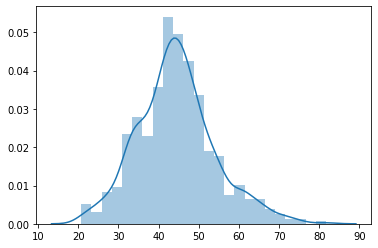

In [34]:
import seaborn as sns
sns.distplot(y_pred)

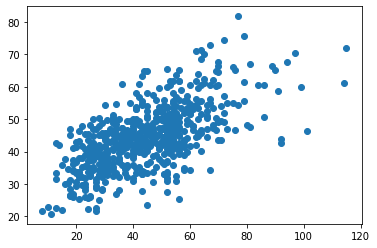

In [35]:
plt.scatter(y_test,y_pred)

In [36]:

from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


RMSE: 12.919680965293272


hello
Wall time: 999 µs
